# Machine Learning 2022
## Lab. 2 - Logistic regression
### Imię i nazwisko: Kacper Moździerz
### Nr albumu: 401733
### Data: 15.03.2022

### Grupa: wtorek 9:30 - 11:00


## Binary logistic regression:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

Ex.0 - getting familiar with dataset

In [2]:
data.head(10)

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [3]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [4]:
data.dropna()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


Ex. 1 - preparing data for regression

In [5]:
data.insert(loc=0, column='1s', value=1)


In [6]:
data.head(5)

,1s,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


Ex.1 - data sorting and conversion to numpy

In [7]:
X = data.iloc[:, 0:3]
y = data.iloc[:, 3]

In [8]:
X_ = np.array(X)
y_ = np.array(y)

Ex.2 - data scatter plot, data normalization

In [9]:
X_norm = np.ones(X_.shape)
for i in range(1, X_.shape[1]):
    X_norm[:,i] = (X_[:,i] - X_[:,i].mean()) / X_[:,i].std()

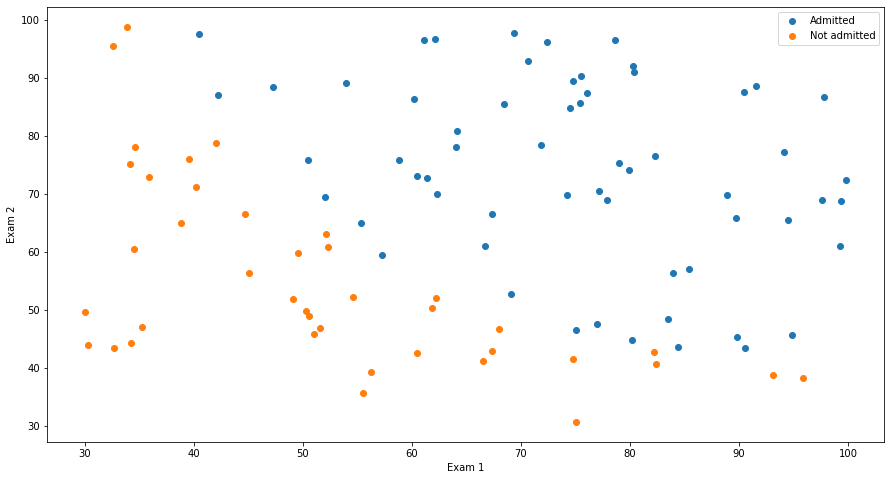

In [10]:
plt.figure(figsize=[15,8])


X1 = data[data['Admitted'] == 1]
X0 = data[data['Admitted'] == 0]

plt.scatter(x =X1['Exam 1'], y=X1['Exam 2'])
plt.scatter(x =X0['Exam 1'], y=X0['Exam 2'])
plt.legend(['Admitted', 'Not admitted'])
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.show()

Ex.3 - logistic function implementation

In [11]:
def sig(t):
    return 1/(1+np.exp(-t))

Ex.4 - logistic func. plot

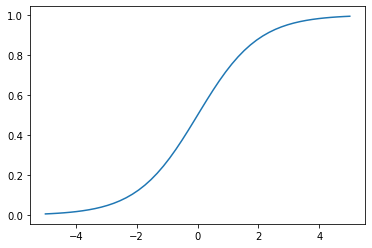

In [12]:
plt.figure()
plt.plot(np.linspace(-5,5), sig(np.linspace(-5,5)))
plt.show()

Ex. 5 - cost function inplementation

In [13]:
def Compute_cost(X, y, theta):
    hx = sig(X @ theta.T)

    acc = (-y*np.log(hx) - (1 - y)*np.log(1-hx)).sum()

    return 1/X.shape[0] * acc



In [14]:
Compute_cost(X_norm,y_,np.zeros(3))

0.6931471805599453

Ex. 6 - simple gradient function implementation


In [15]:
def simple_gradient(X, y, theta, alpha=1, it=150):

    m = X.shape[0]
    cost = []
    hx = 0
    for i in range(it):
        hx = sig(X @ theta.T)
        theta = theta - (alpha / m) * ((hx-y)*X.T).sum(axis=1)
        cost.append(Compute_cost(X,y,theta))
    return theta, cost

In [16]:
theta_new, cost_arr = simple_gradient(X_norm,y_,np.zeros(3))
print(f"Optimal values of theta parameter: {theta_new}")
print(f"For computed optimal theta values,\nvalue of cost function is: {cost_arr[-1]}")

Optimal values of theta parameter: [1.41957362 3.35941597 3.11271333]
For computed optimal theta values,
value of cost function is: 0.20640714304449778


Ex. 7 - accuracy of algortihm performance

In [17]:
threshold = .5
y_predicted = sig(X_norm @ theta_new) > threshold

In [18]:
accuracy = (y_ == y_predicted).sum() / len(y_)

print(f"Accuracy of algorithm is: {accuracy*100}%")

Accuracy of algorithm is: 89.0%


Ex. 8 - visualization of data classifying

In [19]:
data2 = np.concatenate((X_norm, y_.reshape(1,-1).T), axis=1)

m = -theta_new[1] / theta_new[2]
c = -theta_new[0] / theta_new[2]

<Figure size 432x288 with 0 Axes>

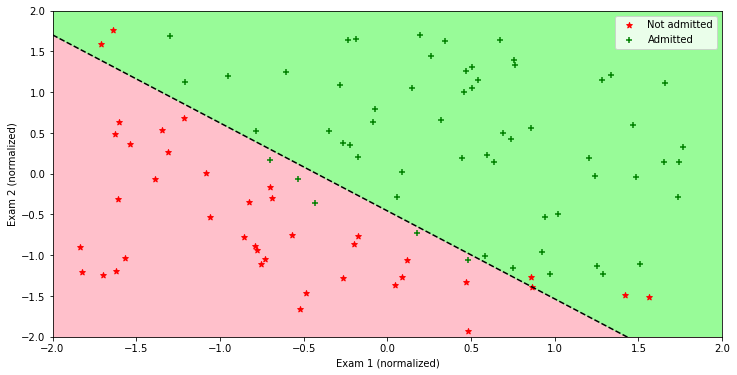

In [20]:
plt.figure()

plt.figure(figsize=(12, 6))

x_vec = np.linspace(-2, 2)
plt.plot(x_vec, x_vec*m + c, 'k--')
plt.fill_between(x_vec, x_vec*m + c, -2, color='pink')
plt.fill_between(x_vec, x_vec*m + c, 2, color='palegreen')
plt.scatter(data2[data2[:,3]==0][:,1], data2[data2[:,3] == 0][:,2], marker='*', c='red', label="Not admitted")
plt.scatter(data2[data2[:,3]==1][:,1], data2[data2[:,3] == 1][:,2], marker='+', c='green', label="Admitted")

plt.xlim([-2, 2])
plt.ylim([-2, 2])

plt.xlabel('Exam 1 (normalized)')
plt.ylabel('Exam 2 (normalized)')
plt.legend()
plt.show()

## Logistic regression - Python:

### Multi-class logistic regression

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
 
iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target

Ex. 1 - creating Logistic regression model

In [22]:
logreg = LogisticRegression(penalty='l1', solver='liblinear')

Ex. 2 - fitting and ploting regression data

C:\ProgramData\Anaconda3\envs\abd_env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


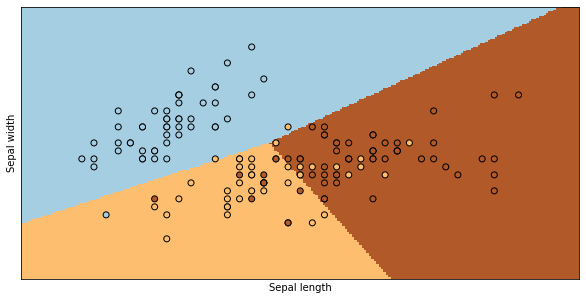

In [23]:
logreg.fit(X,Y)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
 
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()